In [ ]:
-!pip install --upgrade --ignore-installed kaggle

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f5/71/45d36a8df68f3ebb098d6861b2c017f3d094538c0fb98fa61d4dc43e69b9/urllib3-1.26.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/a0/5f06e1e1d463903cf0c0eebeb751791119ed7a4b3737fdc9a77f1cdfb51f/certifi-2020.12.5-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3f79a5b7b6aea925a15dd1e5c4992a4/python_slugify-4.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/29/c1/24814557f1d22c56d50280771a17307e6bf87b70727d975fd6b2ce6b014a/requests-2.25.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a2

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"abraranwarqureshi","key":"9d5eceb9384d08f498e32d1b2e2b212d"}'}

In [ ]:
!mkdir ~/.kaggle #created at root folder in colab

In [ ]:
#copy
!cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

In [ ]:
!unzip -q intel-image-classification.zip

In [32]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

In [5]:
# Select model for classification with weights trained for imagenet
model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# Add custom layers
flat1 = Flatten()(model.layers[-1].output) # flatten last layer
class1 = Dense(1024, activation='relu')(flat1) # add FC layer on previous layer
output = Dense(6, activation='softmax')(class1) # add softmax layer

In [7]:
# Only make new added layers trainable
for layer in model.layers[:-3]:
	    layer.trainable = False

for layer in model.layers:
	    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1e802c12e8> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f1e7fa203c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1e7fa20550> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f1e7fa20ac8> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f1e46703278> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f1e46737240> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1e467347b8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1e4677c6a0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f1e4d63d2b0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f1e4d6b2ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1e4d6af438> False
<tensorflow.python.keras.laye

In [8]:
# Check model flow
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
import os
import cv2
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt

In [27]:
# Set dataset paths
train_dir = path + "intel-image-classification/seg_train/seg_train/"
test_dir = path + "intel-image-classification/seg_test/seg_test/"
pred_dir = path + "test-data/seg_pred/seg_pred/"
vis_dir = path + "predict/"

In [22]:
# Create dataset batches for model with image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=64,
        seed=1)

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        shuffle=False,
        target_size=(150, 150),
        batch_size=64,
        seed=1)

pred_datagen = ImageDataGenerator()

prediction_generator = pred_datagen.flow_from_directory(
        pred_dir,
        shuffle=False,
        target_size=(150, 150),
        batch_size=64,
        seed=1)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 6 classes.


In [12]:
# Compile model
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
# Train model
H = model.fit(
      train_generator,
      epochs=8,
      validation_data=validation_generator,
      verbose=1) 

Epoch 1/8
220/220 [==============================] - 3247s 15s/step - loss: 0.9887 - accuracy: 0.7256 - val_loss: 0.3352 - val_accuracy: 0.8833
Epoch 2/8
220/220 [==============================] - 99s 448ms/step - loss: 0.4128 - accuracy: 0.8518 - val_loss: 0.3044 - val_accuracy: 0.8877
Epoch 3/8
220/220 [==============================] - 98s 444ms/step - loss: 0.3499 - accuracy: 0.8708 - val_loss: 0.2942 - val_accuracy: 0.8943
Epoch 4/8
220/220 [==============================] - 98s 446ms/step - loss: 0.3389 - accuracy: 0.8751 - val_loss: 0.2868 - val_accuracy: 0.9007
Epoch 5/8
220/220 [==============================] - 98s 444ms/step - loss: 0.3322 - accuracy: 0.8780 - val_loss: 0.3038 - val_accuracy: 0.9003
Epoch 6/8
220/220 [==============================] - 98s 446ms/step - loss: 0.3161 - accuracy: 0.8831 - val_loss: 0.2748 - val_accuracy: 0.9000
Epoch 7/8
220/220 [==============================] - 98s 446ms/step - loss: 0.3040 - accuracy: 0.8891 - val_loss: 0.2698 - val_accuracy:

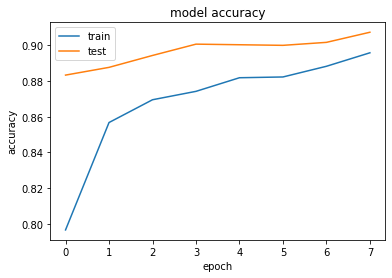

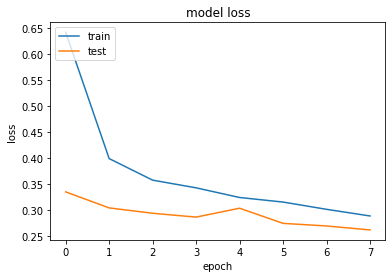

In [14]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# save the model's trained weights
model.save_weights(path + 'resnet_transfer_trained_wts.h5')

In [15]:
# load the model's trained weights
model.load_weights(path + 'resnet_transfer_trained_wts.h5')

In [23]:
# evaluate the model on a test dataset
results = model.evaluate(prediction_generator, batch_size=64, verbose=1)
print("test loss, test acc:", results)

115/115 [==============================] - 16s 138ms/step - loss: 0.3649 - accuracy: 0.8821
test loss, test acc: [0.3648953139781952, 0.8820709586143494]


In [24]:
# model prediction
prediction = model.predict(prediction_generator, batch_size=64, verbose=1)

115/115 [==============================] - 15s 134ms/step


In [38]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
pred = np.argmax(prediction, axis=1)
print('Confusion Matrix:')
print(confusion_matrix(prediction_generator.classes, pred))

Confusion Matrix:
[[1006    4    7    2   12  113]
 [   3 1144    3    7    4    5]
 [   3    7 1020  242   53    5]
 [   5    7   73 1140   70    2]
 [  11    7   35   73  993    9]
 [  67   10    9    4    9 1137]]


In [39]:
# Classification Report
print('Classification Report:')
target_names = ['Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street']
print(classification_report(prediction_generator.classes, pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

   Buildings       0.92      0.88      0.90      1144
      Forest       0.97      0.98      0.98      1166
     Glacier       0.89      0.77      0.82      1330
    Mountain       0.78      0.88      0.82      1297
         Sea       0.87      0.88      0.88      1128
      Street       0.89      0.92      0.91      1236

    accuracy                           0.88      7301
   macro avg       0.89      0.88      0.88      7301
weighted avg       0.88      0.88      0.88      7301



In [43]:
# Visual Results
vis_datagen = ImageDataGenerator()

vis_generator = vis_datagen.flow_from_directory(
        vis_dir, 
        shuffle=False, 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        seed=1)

visual = model.predict(vis_generator, batch_size=1, verbose=1)
vis = np.argmax(visual, axis=1)
print('Confusion Matrix:')
print(confusion_matrix(vis_generator.classes, vis))


Found 6 images belonging to 6 classes.
6/6 [==============================] - 0s 17ms/step
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]
